# King County Project

## Business Problem

A client in King County, WA wants to advise homeowners on **home improvement projects** that will **add to the sale value of their homes**.

**This advice should be based on data from the most recent full calendar year, 2019**.

### Core questions:
Enclosing a porch will increase the sale price of a home.

Converting a garage to a bedroom is a good way to increase the sale price of a home.

Upgrading to a forced-air heating system will increase the sale price of a home.

### Core Goals:
Create model

Interpret results

Make recomendations

## Schedule

### Friday 2/19: 
#### Business Understanding & Preliminary EDA
* Repo Creation
* Data Importation
* Database Creation
* Created initial data frame.

### Saturday 2/20: 
#### Data Understanding & EDA
* Added ```.gitignore``` file in exploratory directory to exclude ```KingDB.db``` file.
* Created ```lookup()``` function.
* Created 2019 data frame.
* Created ```nz19``` data frame of 2019 documents with non-zero sale prices.

### Sunday 2/21: 
##### Data Prep

* Added a ```function.py``` module to contain the functions written while working through the project.
* Created a ```col_stripper()``` function, and appended it, ```fetch()```, and ```lookup()``` to the ```function``` module.
* Did some data cleaning on the lookup dataframe ```df_look```.
* Made a ```heat_df``` data frame with the ```'SalePrice'``` target and ```'HeatSystems'``` predictor.
* Converted  ```'HeatSystems'``` to a column called ```'HeatNames'```with more descriptive values.
* Perfomed one-hot encoding on ```'HeatNames'``` and created a ```model_df```.
* Created a correlation matrix and heatmap for ```model_df```.


# Initial EDA Work

#### Importing Libraries and Adjusting Settings

In [1]:
# import modules for eda and plotting
import pandas as pd
import numpy as np
import scipy.stats as stats

import sqlite3

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import functions as fn

# setting plots to inline
%matplotlib inline

# setting the max number of rows displayed
pd.options.display.max_rows = 200

## SQL Dataframe

### SQL Prelim Work

#### Created Database
Earlier, wrote up a [DB Creator](DB_Creator.ipynb) notebook and ran it to create an SQL database from the raw ```.csv``` files.

#### Creating DataFrame From the Database

Connecting to the database, and creating a cursor object. Joining the database tables into a second main data frame. Lastly, checking basic information about the data frame.

In [2]:
# creating database, connection, and cursor
conn = sqlite3.connect('KingDB.db')  
cur = conn.cursor()

In [3]:
# checking the table names
q = """SELECT name FROM sqlite_master 
WHERE type IN ('table','view') 
AND name NOT LIKE 'sqlite_%'
ORDER BY 1"""
fn.fetch(cur, q)

[('LOOK',), ('PARC',), ('RESB',), ('SALES',)]

### Joining Tables to Create the Main Data Frame

In [4]:
# joining tables to create dataframe and appending column names
q = """SELECT*FROM SALES AS SA
       JOIN PARC AS PA
       ON SA.Major = PA.Major
       AND SA.Minor = PA.Minor
       JOIN RESB AS RE
       ON PA.Major = RE.Major
       AND PA.Minor = RE.Minor
       """
df = pd.DataFrame(fn.fetch(cur, q))
df.columns = [i[0] for i in cur.description]

In [5]:
# checking info, shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251300 entries, 0 to 251299
Columns: 156 entries, ExciseTaxNbr to AddnlCost
dtypes: object(156)
memory usage: 299.1+ MB


### Creating the Lookup Data Frame

In [6]:
# joining tables to create dataframe and appending column names
q = """SELECT*FROM LOOK"""
look = pd.DataFrame(fn.fetch(cur, q))
look.columns = [i[0] for i in cur.description]

#### Checking the Lookup Data Frame

Getting basic info, checking the first row, description strings, and cleaning the columns.

In [7]:
# getting info for lookup data frame
look.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LUType         1208 non-null   object
 1   LUItem         1208 non-null   object
 2   LUDescription  1208 non-null   object
dtypes: object(3)
memory usage: 28.4+ KB


In [8]:
# checking first row
look.head(1)

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY ...


In [9]:
# checking strings
look.LUType.values[:2], look.LUItem.values[:2], look.LUDescription.values[:2]

(array(['1  ', '1  '], dtype=object),
 array(['1  ', '10 '], dtype=object),
 array(['LAND ONLY                                         ',
        'Land with new building                            '], dtype=object))

Cleaning strings and checking results.

In [10]:
# cleaning strings
look['LUType'] = fn.col_stripper(look, 'LUType')
look['LUItem'] = fn.col_stripper(look, 'LUItem')
look['LUDescription'] = fn.col_stripper(look, 'LUDescription')

In [11]:
# checking results
print(look.LUType.values)
print(look.LUItem.values)
look.LUDescription.values

['1' '1' '1' ... '99' '99' '99']
['1' '10' '11' ... '3' '4' '5']


array(['LAND ONLY', 'Land with new building',
       'Household, single family units', ..., 'AVERAGE', 'ABOVE AVERAGE',
       'EXCELLENT'], dtype=object)

### Checking & Dealing with Columns in Main Data Frame
Working through the columns of the main data frame to narrow down the list of features to a more manageable size.

In [12]:
# checking columns
list(df.columns)

['ExciseTaxNbr',
 'Major',
 'Minor',
 'DocumentDate',
 'SalePrice',
 'RecordingNbr',
 'Volume',
 'Page',
 'PlatNbr',
 'PlatType',
 'PlatLot',
 'PlatBlock',
 'SellerName',
 'BuyerName',
 'PropertyType',
 'PrincipalUse',
 'SaleInstrument',
 'AFForestLand',
 'AFCurrentUseLand',
 'AFNonProfitUse',
 'AFHistoricProperty',
 'SaleReason',
 'PropertyClass',
 'SaleWarning',
 'Unnamed: 0',
 'Major',
 'Minor',
 'PropName',
 'PlatName',
 'PlatLot',
 'PlatBlock',
 'Range',
 'Township',
 'Section',
 'QuarterSection',
 'PropType',
 'Area',
 'SubArea',
 'SpecArea',
 'SpecSubArea',
 'DistrictName',
 'LevyCode',
 'CurrentZoning',
 'HBUAsIfVacant',
 'HBUAsImproved',
 'PresentUse',
 'SqFtLot',
 'WaterSystem',
 'SewerSystem',
 'Access',
 'Topography',
 'StreetSurface',
 'RestrictiveSzShape',
 'InadequateParking',
 'PcntUnusable',
 'Unbuildable',
 'MtRainier',
 'Olympics',
 'Cascades',
 'Territorial',
 'SeattleSkyline',
 'PugetSound',
 'LakeWashington',
 'LakeSammamish',
 'SmallLakeRiverCreek',
 'OtherView',

In [13]:
# # dropping unnamed column found above
# df.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
# using custom dropper function to remove unnamed column found above
fn.dropper(df, ['Unnamed: 0'], True)

In [15]:
# checking first row
df.head(1)

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,2743355,638580,0110,07/14/2015,190000,20150715002686,,,,,...,1,0,1,1963,0,0,0,0,3,0


### Checking For Null Values

In [16]:
# checking nulls and shape
print(df.isna().sum())
df.shape

ExciseTaxNbr                   0
Major                          0
Minor                          0
DocumentDate                   0
SalePrice                      0
RecordingNbr                   0
Volume                         0
Page                           0
PlatNbr                        0
PlatType                       0
PlatLot                        0
PlatBlock                      0
SellerName                     0
BuyerName                      0
PropertyType                   0
PrincipalUse                   0
SaleInstrument                 0
AFForestLand                   0
AFCurrentUseLand               0
AFNonProfitUse                 0
AFHistoricProperty             0
SaleReason                     0
PropertyClass                  0
SaleWarning                    0
Major                          0
Minor                          0
PropName                   11473
PlatName                   29223
PlatLot                        0
PlatBlock                      0
Range     

(251300, 155)

Checking ```'SpecArea', 'SpecSubArea'``` columns.

In [17]:
# inspecting columns with custom chunker() function
fn.chunker(df, ['SpecArea', 'SpecSubArea'])

,SpecArea,SpecSubArea
0,None,None
1,None,None
2,None,None


It looks like the ```'SpecArea'``` and ```'SpecSubArea'``` are extraneous columns for modeling purposes so they will be dropped.

In [18]:
# dropping columns and checking first row
fn.dropper(df, ['SpecArea', 'SpecSubArea'], True)
df.head(1)

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,2743355,638580,0110,07/14/2015,190000,20150715002686,,,,,...,1,0,1,1963,0,0,0,0,3,0


### Inspecting Columns with Null Values

In [19]:
# checking problematic columns
li = ['PropName', 'PlatName', 'DirectionPrefix', 'DirectionSuffix', 'ZipCode']
fn.chunker(df, li)

,PropName,PlatName,DirectionPrefix,DirectionSuffix,ZipCode
0,,OLYMPIC TERRACE ADD,,S,98188
1,None,VINTNER'S PLACE,NE,,None
2,,LAKE UNION ADD,,N,98103


### Keeping ```'ZipCode'``` Column but Dropping Others

The othe columns have to do with Plat Mapping and seem irrelevant to the model. Zip Codes can have value as proxy indicators so may be useful later.

In [20]:
# dropping extraneous columns
fn.dropper(df, li[:3], True)

### Checking Next Batch of Columns

Seem to be a mix of blank columns and administrative information that will probably have no effect on the model.

In [21]:
# checking columns 
li = ['RecordingNbr', 'Volume', 'Page', 'PlatNbr' ,'PlatType',\
    'PlatLot', 'PlatBlock', 'SellerName', 'BuyerName']
fn.chunker(df,li)

,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatLot,PlatBlock,PlatBlock,SellerName,BuyerName
0,20150715002686,,,,,,11,,,GINGRICH AUDREY B ...,NATION FRED I ...
1,20161228000896,,,,,,24,,,QUADRANT CORPORATION ...,KANG JING ...
2,20170426000922,,,,,,9,,42,MALLAHAN MATTHEW JOSEPH ...,MALLAHAN CAROLYN S ...


Dropping columns and checking the results.

In [22]:
# dropping blank and extraneous columns
fn.dropper(df, li, True)

In [23]:
# checking first row
df.head(1)

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,2743355,638580,0110,07/14/2015,190000,3,6,3,N,N,...,1,0,1,1963,0,0,0,0,3,0


### Checking for Duplicate Columns

Before going any further, finding and dropping any dupes.

In [24]:
# checking for duplicate columns
df.loc[:, df.columns.duplicated()].head(3)

,Major,Minor,Major,Minor
0,638580,0110,638580,0110
1,894677,0240,894677,0240
2,408330,4150,408330,4150


In [25]:
# dropping duplicate column and checking shape
df = df.loc[:,~df.columns.duplicated()]
df.shape

(251300, 135)

###  Swapping Column Order & Adding an ```'ID'``` Feature
Doing a little house cleaning by moving the ```'SalePrice'``` target variable to the front of the data frame and creating an ```'ID'``` feature by combining the```'Major'``` and ```'Minor'``` values into a single string. Moving the ```'ID'``` feature to second position in the data frame.

In [26]:
# moving target variable to the front column of the df
columns = list(df.columns)
columns = [columns[4]] + columns[:4] + columns[5:]
df = df[columns]
df.head(3)

,SalePrice,ExciseTaxNbr,Major,Minor,DocumentDate,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,190000,2743355,638580,0110,07/14/2015,3,6,3,N,N,...,1,0,1,1963,0,0,0,0,3,0
1,818161,2841697,894677,0240,12/21/2016,2,6,3,N,N,...,0,0,0,2016,0,0,0,0,3,0
2,0,2860712,408330,4150,03/15/2017,3,6,15,N,N,...,1,0,0,1906,0,0,0,0,4,0


In [27]:
# creating 'ID' column
df['ID'] = df['Major'] + df['Minor']

In [28]:
# getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251300 entries, 0 to 251299
Columns: 136 entries, SalePrice to ID
dtypes: object(136)
memory usage: 260.7+ MB


In [29]:
# moving ID column to the front column of the df
columns = list(df.columns)
columns = columns[:1] + [columns[135]] + columns[1:135]
df = df[columns]
df.head(1)

,SalePrice,ID,ExciseTaxNbr,Major,Minor,DocumentDate,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,190000,6385800110,2743355,638580,0110,07/14/2015,3,6,3,N,...,1,0,1,1963,0,0,0,0,3,0


### Inspecting Columns and Dropping Extraneous Features
Working through the list of columns step by step and removing features that seem like they will have minimal impact of the model.

In [30]:
# printing list of columns
list(df.columns)

['SalePrice',
 'ID',
 'ExciseTaxNbr',
 'Major',
 'Minor',
 'DocumentDate',
 'PropertyType',
 'PrincipalUse',
 'SaleInstrument',
 'AFForestLand',
 'AFCurrentUseLand',
 'AFNonProfitUse',
 'AFHistoricProperty',
 'SaleReason',
 'PropertyClass',
 'SaleWarning',
 'Range',
 'Township',
 'Section',
 'QuarterSection',
 'PropType',
 'Area',
 'SubArea',
 'DistrictName',
 'LevyCode',
 'CurrentZoning',
 'HBUAsIfVacant',
 'HBUAsImproved',
 'PresentUse',
 'SqFtLot',
 'WaterSystem',
 'SewerSystem',
 'Access',
 'Topography',
 'StreetSurface',
 'RestrictiveSzShape',
 'InadequateParking',
 'PcntUnusable',
 'Unbuildable',
 'MtRainier',
 'Olympics',
 'Cascades',
 'Territorial',
 'SeattleSkyline',
 'PugetSound',
 'LakeWashington',
 'LakeSammamish',
 'SmallLakeRiverCreek',
 'OtherView',
 'WfntLocation',
 'WfntFootage',
 'WfntBank',
 'WfntPoorQuality',
 'WfntRestrictedAccess',
 'WfntAccessRights',
 'WfntProximityInfluence',
 'TidelandShoreland',
 'LotDepthFactor',
 'TrafficNoise',
 'AirportNoise',
 'PowerLine

In [31]:
# creating data frame to inspect latest batch of columns
li =['SaleInstrument',
 'AFForestLand',
 'AFCurrentUseLand',
 'AFNonProfitUse',
 'AFHistoricProperty',
 'SaleReason',
 'PropertyClass',
 'SaleWarning']
fn.chunker(df, li)

,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,3,N,N,N,N,1,8,15
1,3,N,N,N,N,1,8,
2,15,N,N,N,N,11,8,18 31 38


#### Using Lookup Table For More Info on the Features
Checking lookup data and dropping columns.

In [32]:
# using custom lookup function to print info 
fn.lookup(look, 6), fn.lookup(look, 4)

(     LUType LUItem                    LUDescription
 1002      6      1                             None
 1003      6     10             Real Estate Contract
 1004      6     11           Purchaser's Assignment
 1005      6     13              Seller's Assignment
 1006      6     15                  Quit Claim Deed
 1007      6     18                   Trustees' Deed
 1008      6     19                  Executor's Deed
 1009      6      2                    Warranty Deed
 1010      6     20                   Fiduciary Deed
 1011      6     21                   Sheriff's Deed
 1012      6     22           Bargain and Sales Deed
 1013      6     23                   Receivers Deed
 1014      6     24             Deed of Personal Rep
 1015      6     25         Judgment Per Stipulation
 1016      6     26            Other - See Affidavit
 1017      6     27                             DEED
 1018      6     28  Forfeiture Real Estate Contract
 1019      6      3          Statutory Warrant

#### Dropping Columns
Seems to be more administrative data that can be safely dropped. Droppping columns and grabbing new batch for inspection.

In [33]:
# dropping extraneous columns
fn.dropper(df, li, True)

In [34]:
# printing list of cols
list(df.columns)

['SalePrice',
 'ID',
 'ExciseTaxNbr',
 'Major',
 'Minor',
 'DocumentDate',
 'PropertyType',
 'PrincipalUse',
 'Range',
 'Township',
 'Section',
 'QuarterSection',
 'PropType',
 'Area',
 'SubArea',
 'DistrictName',
 'LevyCode',
 'CurrentZoning',
 'HBUAsIfVacant',
 'HBUAsImproved',
 'PresentUse',
 'SqFtLot',
 'WaterSystem',
 'SewerSystem',
 'Access',
 'Topography',
 'StreetSurface',
 'RestrictiveSzShape',
 'InadequateParking',
 'PcntUnusable',
 'Unbuildable',
 'MtRainier',
 'Olympics',
 'Cascades',
 'Territorial',
 'SeattleSkyline',
 'PugetSound',
 'LakeWashington',
 'LakeSammamish',
 'SmallLakeRiverCreek',
 'OtherView',
 'WfntLocation',
 'WfntFootage',
 'WfntBank',
 'WfntPoorQuality',
 'WfntRestrictedAccess',
 'WfntAccessRights',
 'WfntProximityInfluence',
 'TidelandShoreland',
 'LotDepthFactor',
 'TrafficNoise',
 'AirportNoise',
 'PowerLines',
 'OtherNuisances',
 'NbrBldgSites',
 'Contamination',
 'DNRLease',
 'AdjacentGolfFairway',
 'AdjacentGreenbelt',
 'HistoricSite',
 'CurrentUseDe

#### Inspecting Batch and Checking ```'DistrictName'``` Feature

In [35]:
# checking columns
li = ['Range',
 'Township',
 'Section',
 'QuarterSection',
 'PropType',
 'Area',
 'SubArea',
 'DistrictName',
 'LevyCode',
 'CurrentZoning']
fn.chunker(df, li)

,Range,Township,Section,QuarterSection,PropType,Area,SubArea,DistrictName,LevyCode,CurrentZoning
0,4,23,21,NE,R,24,3,SeaTac,2212,UL-7200
1,5,26,27,NW,R,93,7,KIRKLAND,1705,RSA 8
2,4,25,18,SE,R,43,7,SEATTLE,0010,SF 5000


In [36]:
# getting unique values
df['DistrictName'].unique()

array(['SeaTac', 'KIRKLAND', 'SEATTLE', 'DUVALL', 'MAPLE VALLEY',
       'KING COUNTY', 'TUKWILA', 'AUBURN', 'KENT', 'BELLEVUE',
       'FEDERAL WAY', 'REDMOND', 'NORMANDY PARK', 'SHORELINE', 'RENTON',
       'SNOQUALMIE', 'SAMMAMISH', 'BURIEN', 'BOTHELL', 'PACIFIC',
       'DES MOINES', 'KENMORE', 'ALGONA', 'COVINGTON', 'NORTH BEND',
       'BLACK DIAMOND', 'ENUMCLAW', 'LAKE FOREST PARK', 'MERCER ISLAND',
       'WOODINVILLE', 'ISSAQUAH', 'NEWCASTLE', 'CLYDE HILL', 'MEDINA',
       'SKYKOMISH', 'CARNATION', 'YARROW POINT', 'MILTON', 'BEAUX ARTS',
       'HUNTS POINT'], dtype=object)

#### Slicing List and Dropping Features Except for ```'DistrictName'```
District name seems like it may be useful so will be kept for now.

In [37]:
li = li[:7] + li[8:10]
fn.dropper(df, li, True)

##### Processing Next Batch
Creating dataframe and using lookup data to inspect features.

In [38]:
li = ['HBUAsIfVacant',
 'HBUAsImproved',
 'PresentUse',
 'SqFtLot',
 'WaterSystem',
 'SewerSystem',
 'Access',
 'Topography',
 'StreetSurface',
 'RestrictiveSzShape',
 'InadequateParking',
 'PcntUnusable',
 'Unbuildable',]
fn.chunker(df, li)

,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable
0,1,1,2,10534,2,2,4,0,1,0,2,0,False
1,1,1,2,3813,2,2,4,0,1,0,0,0,False
2,1,1,2,3420,2,2,4,0,1,0,2,0,False


In [39]:
# looking up HBU As If Vacant, HBU As Improved, Present Use features
fn.lookup(look,103), fn.lookup(look, 104), fn.lookup(look, 102)

(    LUType LUItem            LUDescription
 213    103      1            SINGLE FAMILY
 214    103     10  AMUSEMENT/ENTERTAINMENT
 215    103     11                 CULTURAL
 216    103     12      EDUCATIONAL SERVICE
 217    103     13       COMMERCIAL SERVICE
 218    103     14         RETAIL/WHOLESALE
 219    103     15            MANUFACTURING
 220    103     16             AGRICULTURAL
 221    103     17                 FORESTRY
 222    103     18     FISH & WILDLIFE MGMT
 223    103     19                  MINERAL
 224    103      2                   DUPLEX
 225    103     20        REGIONAL LAND USE
 226    103     21                MIXED USE
 227    103      3                  TRIPLEX
 228    103      4              MOBILE HOME
 229    103      5        OTHER SF DWELLING
 230    103      6    MULTI-FAMILY DWELLING
 231    103      7          GROUP RESIDENCE
 232    103      8        TEMPORARY LODGING
 233    103      9          PARK/RECREATION,
     LUType LUItem LUDescriptio

In [40]:
# looking up info for Water System, Sewer System, Access features
fn.lookup(look, 56), fn.lookup(look, 57), fn.lookup(look, 55)

(    LUType LUItem       LUDescription
 989     56      1             PRIVATE
 990     56      2      WATER DISTRICT
 991     56      3  PRIVATE RESTRICTED
 992     56      4   PUBLIC RESTRICTED,
     LUType LUItem       LUDescription
 993     57      1             PRIVATE
 994     57      2              PUBLIC
 995     57      3  PRIVATE RESTRICTED
 996     57      4   PUBLIC RESTRICTED,
     LUType LUItem      LUDescription
 984     55      1         RESTRICTED
 985     55      2  LEGAL/UNDEVELOPED
 986     55      3            PRIVATE
 987     55      4             PUBLIC
 988     55      5            WALK IN)

In [41]:
#  lookup for Topography, Street Surface features
fn.lookup(look, 59), fn.lookup(look, 60)

(     LUType LUItem LUDescription
 1001     59      1           YES,
      LUType LUItem LUDescription
 1026     60      1         PAVED
 1027     60      2        GRAVEL
 1028     60      3          DIRT
 1029     60      4   UNDEVELOPED)

In [42]:
#  lookup for Restrictive Size/Shape, Inadequate Parking features
fn.lookup(look, 90), fn.lookup(look, 92)

(     LUType LUItem LUDescription
 1178     90      1           YES,
      LUType LUItem LUDescription
 1180     92      1    INADEQUATE
 1181     92      2      ADEQUATE)

In [43]:
single = df[(df['PropertyType'] =='11') & (df['PrincipalUse'] == '6')]

single['NbrLivingUnits'].unique()

array(['1', '2', '3', '4'], dtype=object)

## 2019 Data

Since we want to train our model on 2019 data, we are going to isolate the 2019 information into a new data frame and use it to define our target and predictors.

#### Light Data Cleaning

Changing datestrings to datetime objects,  and sale price strings to floats in the main pandas dataframe. Adding a 'DocumentYear' column to main the data frame.

In [44]:
# changing date strings to datetime objects
df.DocumentDate = pd.to_datetime(df.DocumentDate)

# adding a document year column
df['DocumentYear'] = df['DocumentDate'].apply(lambda x: x.year)

# converting SalePrice string to float
df['SalePrice'] = df['SalePrice'].astype('float')

#### Creating Initial 2019 DataFrame

Creating data frame and checking basic information

In [45]:
# isolating 2019 data
df19 = df[df['DocumentYear']==2019]

In [46]:
# checking data frame shape and looking for NaNs
print(df19.shape)
df19.isna().sum()

(43838, 120)


SalePrice                    0
ID                           0
ExciseTaxNbr                 0
Major                        0
Minor                        0
DocumentDate                 0
PropertyType                 0
PrincipalUse                 0
DistrictName                 0
HBUAsIfVacant                0
HBUAsImproved                0
PresentUse                   0
SqFtLot                      0
WaterSystem                  0
SewerSystem                  0
Access                       0
Topography                   0
StreetSurface                0
RestrictiveSzShape           0
InadequateParking            0
PcntUnusable                 0
Unbuildable                  0
MtRainier                    0
Olympics                     0
Cascades                     0
Territorial                  0
SeattleSkyline               0
PugetSound                   0
LakeWashington               0
LakeSammamish                0
SmallLakeRiverCreek          0
OtherView                    0
WfntLoca

In [47]:
# checking first few rows
df19.head(3)

,SalePrice,ID,ExciseTaxNbr,Major,Minor,DocumentDate,PropertyType,PrincipalUse,DistrictName,HBUAsIfVacant,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,DocumentYear
5,560000.0,2130430120,3027422,213043,0120,2019-12-20,11,6,DUVALL,1,...,0,0,1989,0,0,0,0,3,0,2019
6,435000.0,9406520630,3002257,940652,0630,2019-07-22,11,6,MAPLE VALLEY,1,...,0,0,1994,0,0,0,0,3,2500,2019
12,450000.0,1402810020,2993601,140281,0020,2019-06-04,3,6,DUVALL,1,...,0,0,1986,0,0,0,0,3,0,2019


#### Creating a 2019 Dataframe with Non-Zero Sale Prices 

Creating data frame and checking basic information

In [48]:
# creating a datafrme of 2019 data with non-zero sale prices and restting index
nz19 = df19[df19['SalePrice'] != 0].reset_index()

In [49]:
# checking shape and first few rows
print(nz19.shape)
nz19.head(3)

(29944, 121)


,index,SalePrice,ID,ExciseTaxNbr,Major,Minor,DocumentDate,PropertyType,PrincipalUse,DistrictName,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,DocumentYear
0,5,560000.0,2130430120,3027422,213043,0120,2019-12-20,11,6,DUVALL,...,0,0,1989,0,0,0,0,3,0,2019
1,6,435000.0,9406520630,3002257,940652,0630,2019-07-22,11,6,MAPLE VALLEY,...,0,0,1994,0,0,0,0,3,2500,2019
2,12,450000.0,1402810020,2993601,140281,0020,2019-06-04,3,6,DUVALL,...,0,0,1986,0,0,0,0,3,0,2019


In [50]:
# checking for NaNs
df.isna().sum()

SalePrice                     0
ID                            0
ExciseTaxNbr                  0
Major                         0
Minor                         0
DocumentDate                  0
PropertyType                  0
PrincipalUse                  0
DistrictName                  0
HBUAsIfVacant                 0
HBUAsImproved                 0
PresentUse                    0
SqFtLot                       0
WaterSystem                   0
SewerSystem                   0
Access                        0
Topography                    0
StreetSurface                 0
RestrictiveSzShape            0
InadequateParking             0
PcntUnusable                  0
Unbuildable                   0
MtRainier                     0
Olympics                      0
Cascades                      0
Territorial                   0
SeattleSkyline                0
PugetSound                    0
LakeWashington                0
LakeSammamish                 0
SmallLakeRiverCreek           0
OtherVie

## Isolating Target and Initial Predictors

Since two of the questions we want to answer relate to the HeatSystem and SqFtEnclosedPorch features, we are going to isolate them, and our SalePrice target variable, into seperate dataframes. 

### HeatSystem Dataframe

Isolating ```'SalePrice'``` target and ```'HeatSystem'``` predictor in Checking first the few rows, shape, nulls, and unique values.

In [51]:
# Isolating SalePrice target and HeatSystem predictor into a data frame. 
heat_df = nz19[['SalePrice','HeatSystem']]
heat_df.head(3)

,SalePrice,HeatSystem
0,560000.0,5
1,435000.0,5
2,450000.0,1


In [52]:
# checking shape
heat_df.shape

(29944, 2)

In [53]:
# checking NaNs
heat_df.isna().sum()

SalePrice     0
HeatSystem    0
dtype: int64

In [54]:
# checking unique values
print(heat_df.HeatSystem.unique())
len(heat_df.HeatSystem.unique())

['5' '1' '4' '7' '6' '3' '0' '2' '8']


9

In [55]:
# looking up HeatSystem codes
lu_df = fn.lookup(look, 108)
lu_df

,LUType,LUItem,LUDescription
243,108,1,Floor-Wall
244,108,2,Gravity
245,108,3,Radiant
246,108,4,Elec BB
247,108,5,Forced Air
248,108,6,Hot Water
249,108,7,Heat Pump
250,108,8,Other


#### Checking ```'0'``` Values

Checking ```'0'```, since there is not a ```'0'``` lookup code. For now, will be assuming that there is no heating system information available for ```'0'``` enteries. May re-adjust assumption to 'no heating system in property' after researching further. 

In [56]:
# checking '0' values
zero_df = heat_df[heat_df['HeatSystem'] == '0']
print(zero_df.shape)
zero_df.head()

(122, 2)


,SalePrice,HeatSystem
330,305510.0,0
475,650000.0,0
771,749950.0,0
3817,100000.0,0
4771,449000.0,0


#### Prepping for Model Data Frame

Creating an array of the lookup code descriptions, and using it to make a list of values for use in a new column.  Will use this column in a one-hot-encoding procedure for more descriptive column names in the model dataframe.

In [57]:
column_names = lu_df.LUDescription.values
column_names

array(['Floor-Wall', 'Gravity', 'Radiant', 'Elec BB', 'Forced Air',
       'Hot Water', 'Heat Pump', 'Other'], dtype=object)

In [58]:
# putting descriptions into a list in preparation for adding a new column to the dataframe.
heat_names = []
for i in range(len(heat_df['HeatSystem'].values)):
    if heat_df['HeatSystem'].values[i] == '0':
        heat_names.append('NA')
    if heat_df['HeatSystem'].values[i] == '1':
        heat_names.append(column_names[0])
    if heat_df['HeatSystem'].values[i] == '2':
        heat_names.append(column_names[1])
    if heat_df['HeatSystem'].values[i] == '3':
        heat_names.append(column_names[2])
    if heat_df['HeatSystem'].values[i] == '4':
        heat_names.append(column_names[3])
    if heat_df['HeatSystem'].values[i] == '5':
        heat_names.append(column_names[4])
    if heat_df['HeatSystem'].values[i] == '6':
        heat_names.append(column_names[5])
    if heat_df['HeatSystem'].values[i] == '7':
        heat_names.append(column_names[6])
    if heat_df['HeatSystem'].values[i] == '8':
        heat_names.append(column_names[7])

In [59]:
# checking first few entries in list
heat_names[:5]

['Forced Air', 'Forced Air', 'Floor-Wall', 'Forced Air', 'Forced Air']

### Creating New Data Frame

Creating new data frame, dropping old ```'HeatSystems'``` column, and appending a new ```'HeatNames'``` column with more descriptive system names.

In [60]:
# creating new data frame and dropping old 'HeatSystems' column
heat_df2 = heat_df.copy().drop('HeatSystem', axis=1)

In [61]:
# appending new, more descriptive heat systems column, 'HeatNames'
heat_df2['HeatNames'] = heat_names

In [62]:
# checking first few rows
heat_df2.head(3)

,SalePrice,HeatNames
0,560000.0,Forced Air
1,435000.0,Forced Air
2,450000.0,Floor-Wall


#### One-Hot Encoding the HeatSystem Predictor

Instantiating the encoder, fitting the encoder to ```heat_df2[['HeatNames']]``` , and transforming the data. Creating a new ```heat_ohe``` data frame, dropping the ```'HeatNames'``` column from ``` heat_df2```, and concatenating it will ```heat_ohe``` to form a new ```model_df``` data frame.

In [63]:
# instantiating, fitting and transforming
ohcoder = OneHotEncoder(drop='first')

ohcoder.fit(heat_df2[['HeatNames']])

transformed = ohcoder.transform(heat_df2[['HeatNames']])

In [64]:
# creating heat_ohe data frame and checking the first few columns
heat_ohe = pd.DataFrame(transformed.todense(),\
                       columns = ohcoder.get_feature_names())
heat_ohe.head(3)

,x0_Floor-Wall,x0_Forced Air,x0_Gravity,x0_Heat Pump,x0_Hot Water,x0_NA,x0_Other,x0_Radiant
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# dropping the 'HeatNames' column from heat_df2
heat2_dropped = heat_df2.drop('HeatNames', axis=1)

#### Creating ```model_df``` Data Frame

In [66]:
# creating the model dataframe and checking first few rows
model_df = pd.concat([heat2_dropped, heat_ohe], axis=1)
model_df.head(3)

,SalePrice,x0_Floor-Wall,x0_Forced Air,x0_Gravity,x0_Heat Pump,x0_Hot Water,x0_NA,x0_Other,x0_Radiant
0,560000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,435000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,450000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### ```model_df``` Correlation Matrix and Heatmap

In [67]:
model_df.corr()

,SalePrice,x0_Floor-Wall,x0_Forced Air,x0_Gravity,x0_Heat Pump,x0_Hot Water,x0_NA,x0_Other,x0_Radiant
SalePrice,1.000000,-0.013960,-0.058108,-0.001774,0.023708,0.036436,-0.022709,-0.001550,0.006037
x0_Floor-Wall,-0.013960,1.000000,-0.326640,-0.007937,-0.062461,-0.029477,-0.011944,-0.004580,-0.021424
x0_Forced Air,-0.058108,-0.326640,1.000000,-0.074348,-0.585072,-0.276116,-0.111879,-0.042899,-0.200676
x0_Gravity,-0.001774,-0.007937,-0.074348,1.000000,-0.014217,-0.006709,-0.002719,-0.001042,-0.004876
x0_Heat Pump,0.023708,-0.062461,-0.585072,-0.014217,1.000000,-0.052799,-0.021394,-0.008203,-0.038374
x0_Hot Water,0.036436,-0.029477,-0.276116,-0.006709,-0.052799,1.000000,-0.010096,-0.003871,-0.018110
x0_NA,-0.022709,-0.011944,-0.111879,-0.002719,-0.021394,-0.010096,1.000000,-0.001569,-0.007338
x0_Other,-0.001550,-0.004580,-0.042899,-0.001042,-0.008203,-0.003871,-0.001569,1.000000,-0.002814
x0_Radiant,0.006037,-0.021424,-0.200676,-0.004876,-0.038374,-0.018110,-0.007338,-0.002814,1.000000


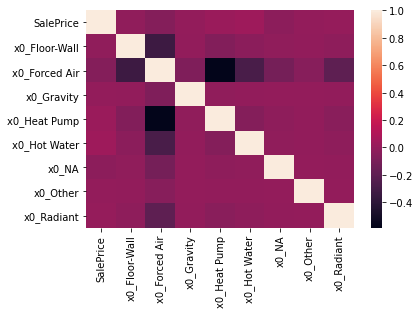

In [68]:
sns.heatmap(model_df.corr());

#### EnclosedPoarch Dataframe

In [69]:
# isolating SalePrice target and SqFtEnclosedPorch predictor
porch_df = nz19[['SqFtEnclosedPorch']]
porch_df.head()

,SqFtEnclosedPorch
0,0
1,0
2,0
3,0
4,0
